In [1]:
import numpy as np
import pandas as pd

stats = pd.read_csv('All_data.csv')

In [ ]:
stats[:1]

In [ ]:
stats.iloc[0]['FO']

In [ ]:
test = []
PlayerList = []
count = 0

for i in range(len(stats)):
    count += 1
    #print(count) count works for all 66 rows
x = stats['Player']
for j in x:
    test.append(j)
    
for k in range(len(stats)):
    PlayerList.append(Player(stats.iloc[i]['Player']))
    
print(PlayerList)

In [ ]:
test[0]

In [ ]:
class Player():
    def teams():
        for k in range(len(stats)):
            PlayerList.append(Player(stats.iloc[i]['Player']))
    
print(PlayerList)

In [ ]:
p1 = stats[1:2]
print(p1)

In [ ]:
stats.set_index("Player", inplace=True)
stats.loc['Brent Seabrook']

In [ ]:
stats.set_index("Pos", inplace=True)
stats.loc['F']

In [ ]:
PlayPos = stats[stats['Pos'] == "C"]
PlayPos[:]

In [ ]:
#Test Players
	p1 = Player('Player 1', 'Arizona', 'C', 0.54, 0.72,0.55,1,1,1,1,1)
	p2 = Player('Player 2', 'Arizona', 'RW', 0.43, 0.62,0.56,1,1,1,1,1)
	p3 = Player('Player 3', 'Arizona', 'LW', 0.44, 0.49,0.49,1,1,1,1,1)
	p4 = Player('Player 4', 'Utah', 'C', 0.49, 0.659,0.51,1,1,1,1,1)
	p5 = Player('Player 5', 'Utah', 'RW', 0.40, 0.33,0.48,1,1,1,1,1)
	p6 = Player('Player 7', 'Utah', 'LW', 0.41, 0.8,0.47,1,1,1,1,1)

	team_1 = [p1,p2,p3]
	team_2 = [p4,p5,p6]

In [ ]:
p1 = Player(stats)

In [2]:
import numpy as np
import pandas as pd
import random

stats = pd.read_csv('All_data.csv')

#Hockey player class
class Player():
	"""This class defines a movie with the players team, position and some other stats"""
	def __init__(self, Name, Team, Pos, FO, SP, CF, GP):
		self.Name = Name
		self.Team = Team
		self.Pos = Pos
		self.FO = FO
		self.SP = SP
		self.CF = CF
		self.GP = GP

	def getName(self):
		return self.Name

	def getTeam(self):
		return self.Team

	def getPosition(self):
		return self.Pos

	def getFO(self):
		return self.FO

	def getSP(self):
		return self.SP

	def getCF(self):
		return self.CF

	def getGP(self):
		return self.GP

	def setFO(self,new_FO):
		self.FO = new_FO

	def setSP(self,new_SP):
		self.SP = new_SP

	def __str__(self):
		return str(self.getName()) + ' plays for ' + str(self.getTeam())
    
#main function to run all sub functions
def main():
	"""Where all functions will run to simulate the game"""
	intro()
	N = getInputs()
	wins_1, wins_2 = simNGames(N)
	gameSummary(wins_1,wins_2)

def intro():
	"""Prints a nice introduction header"""
	print(100*'=')
	a = 'Welcome to the Hockey Simulator! This Simulator uses the current seasons stats to determine the outcome of a game. Teams are preset based on data imported into excel sheet.'
	print(a)
	print(100*'=')

def teams():
	"""Where player objects are created and their stats are imported. Players are then sorted into teams"""
	#Actual Players
	PlayerList = []
	for i in range(len(stats)):
		PlayerList.append(Player(stats.iloc[i]['Player'], stats.iloc[i]['Team'], stats.iloc[i]['Pos'],
								stats.iloc[i]['FO'], stats.iloc[i]['SP'], stats.iloc[i]['CF'], 
								stats.iloc[i]['GP']))
	team_1 = []
	team_2 = []

	for i in PlayerList:
		if i.getTeam() == PlayerList[0].getTeam():
			team_1.append(i)
		else:
			team_2.append(i)

	# #adjusting stats for testing
	# for i in team_1:
	# 	i.setFO(i.getFO()+0.6)
	# 	i.setThru(i.getThru()+0.6)

	return team_1, team_2

def getInputs():
	"""Only used for getting number of games if user wants to simulate more"""
	N = int(input('How many games would you like to simulate: '))
	return N

def simNGames(N):
	"""Simulates number of inputted games and keeps track of stats of each game"""
	team_1, team_2 = teams()
	wins_team_1 = 0
	wins_team_2 = 0

	for i in range(N):
		score_1, score_2, winner = simOneGame(team_1,team_2)

		if winner == team_1[0].getTeam():
			wins_team_1 += 1
		elif winner == team_2[0].getTeam():
			wins_team_2 += 1

	return wins_team_1, wins_team_2

def simOneGame(team_1, team_2):
	"""Main function that game is run under, all game logic is here."""
	minutes = 0
	winner = ''
	score_team_1 = score_team_2 = 0
	Track_changes = False

	controlling_team = faceOff(team_1,team_2)

	while minutes < 60:

		lineup = control(controlling_team,team_1,team_2)

		for i in lineup:
			print(i.getTeam())
			print(i.getSP())
			print(i.getFO())

			if random.random() < i.getSP(): #Seeing if player scores
				# print('someone scored', minutes)
				if i.getTeam() == team_1[0].getTeam():
					print('player scored', i.getTeam())
					score_team_1 += 1
					controlling_team = faceOff(team_1,team_2)
					# print('team 1 scored', minutes)
					print('')
					break

				elif i.getTeam() == team_2[0].getTeam():
					print('player scored', i.getTeam())
					score_team_2 += 1
					controlling_team = faceOff(team_1,team_2)
					# print('team 2 scored', minutes)
					print('')
					break
	
			elif random.random() < i.getCF(): #To see if puck get stolen
				# print('someone missed', minutes)
				if i.getTeam() == team_1[0].getTeam():
					print('had it stolen', i.getTeam())
					controlling_team = team_2[0].getTeam()
					break

				elif i.getTeam() == team_2[0].getTeam():
					print('had it stolen', i.getTeam())
					controlling_team = team_1[0].getTeam()
					break

			print('no one scored or got it stolen')
			print('')

		minutes += 1

	#check if scores are equal and if they are go into overtime
	if score_team_1 == score_team_2:
		overTime()
	elif score_team_1 > score_team_2:
		winner = team_1[0].getTeam()
	elif score_team_2 > score_team_1:
		winner = team_2[0].getTeam()

	return  score_team_1, score_team_2, winner

def Summary(add what I need here):
	"""Output results"""
	print('Team 1 won {0} games'.format(stat1))
	print('Team 2 won {0} games'.format(stat2))
    
    B_reg = [1]*10
    B_SP = [1, 3, 5, 9, 13, 19, 27, 35, 43, 57]
    B_FO = [1, 2, 6, 12, 14, 18, 24, 29, 33, 39]
    
    C_reg = [1]*10
    C_SP = [1, 3, 5, 9, 13, 19, 27, 35, 43, 57]
    C_FO = [1, 2, 6, 12, 14, 18, 24, 29, 33, 39]

def faceOff(team_1, team_2):
	"""Faceoff condtion"""
	controlling_team = ''
	t1c = random.choice([i for i in team_1 if i.getPosition() == 'C'])
	t2c = random.choice([i for i in team_2 if i.getPosition() == 'C'])
	
	if random.random() < t1c.getFO():
		controlling_team = t1c.getTeam()
	else:
		controlling_team = t2c.getTeam()

	return controlling_team

def control(team_name,team_1,team_2):
	"""Function to keep checking who currently has control and will switch the line ups"""
	lineup = ''
	if team_name == team_1[0].getTeam():
		lineup = offensiveLineup(team_1)
	elif team_name == team_2[0].getTeam():
		lineup = offensiveLineup(team_2)

	return lineup

def offensiveLineup(team):
	"""randomly creates offensive lineup"""
	SL = []
	SL.append(random.choice([i for i in team if i.getPosition() == 'LW']))
	SL.append(random.choice([i for i in team if i.getPosition() == 'C']))
	SL.append(random.choice([i for i in team if i.getPosition() == 'RW']))
	return SL

def overTime():
	"""If both teams have same score then game goes into overtime"""
	pass

if __name__ == '__main__': main()

Welcome to the Hockey Simulator! This Simulator uses the current seasons stats to determine the outcome of a game. Teams are preset based on data imported into excel sheet.
How many games would you like to simulate: 1
Blackhawks
5.7
0.25
player scored Blackhawks

Blackhawks
10.6
0.263
player scored Blackhawks

Blackhawks
15.0
0.397
player scored Blackhawks

Blackhawks
10.6
0.263
player scored Blackhawks

Blackhawks
19.1
0.316
player scored Blackhawks

Blackhawks
15.0
0.397
player scored Blackhawks

Blackhawks
16.1
0.28600000000000003
player scored Blackhawks

Blackhawks
0.0
0.0
had it stolen Blackhawks
Bruins
15.1
0.431
player scored Bruins

Blackhawks
0.0
0.0
no one scored or got it stolen

Blackhawks
12.4
0.47700000000000004
player scored Blackhawks

Blackhawks
0.0
0.0
had it stolen Blackhawks
Bruins
15.1
0.431
player scored Bruins

Bruins
13.6
0.33299999999999996
player scored Bruins

Bruins
15.1
0.431
player scored Bruins

Blackhawks
0.0
0.0
had it stolen Blackhawks
Bruins
15.1
0.4

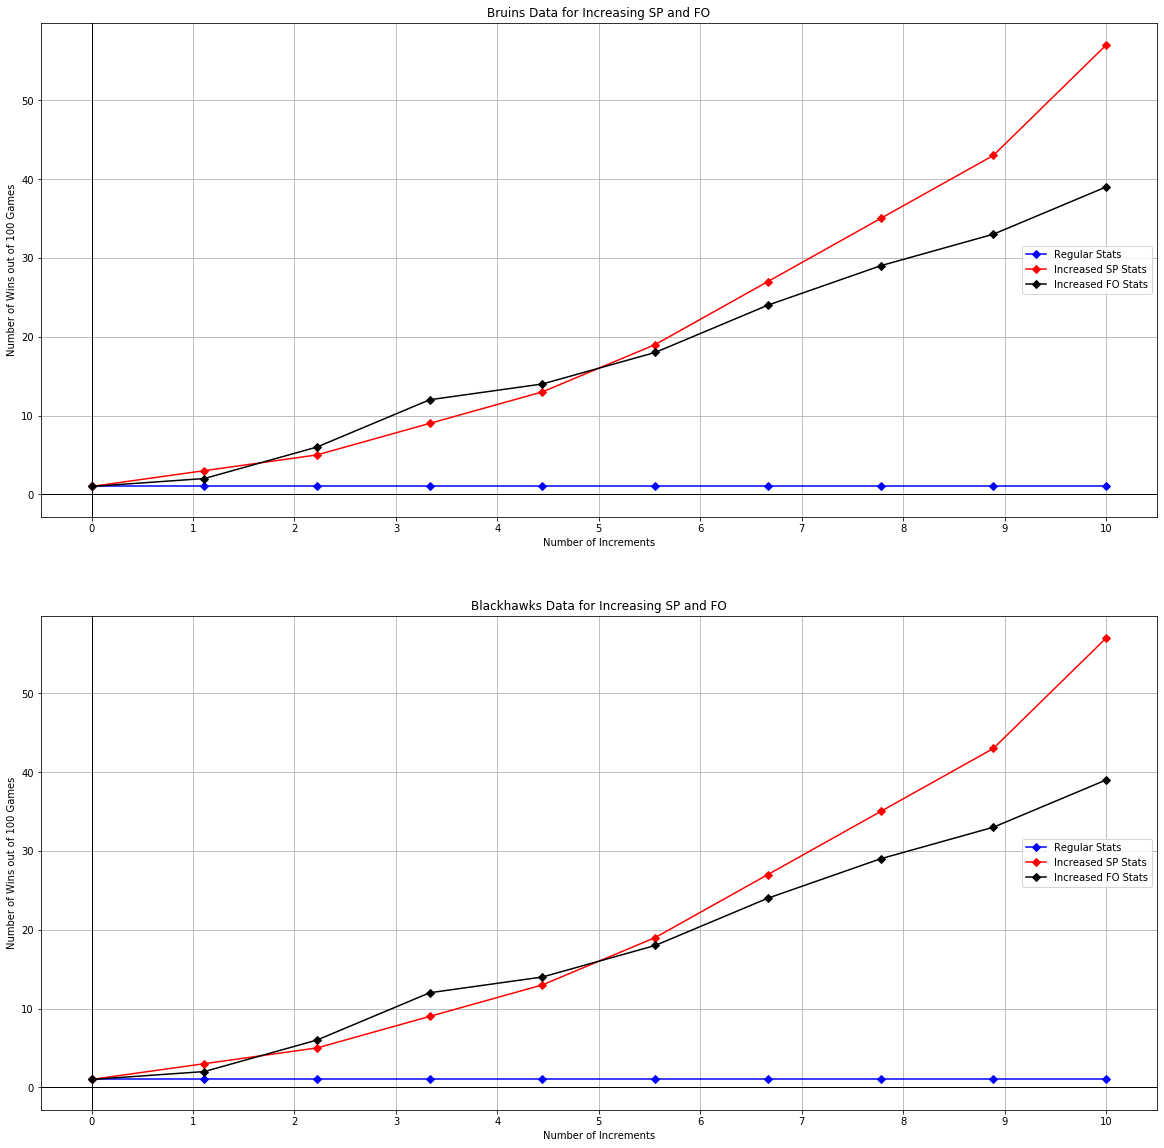

In [27]:
#will run a 100 games with normal stats 10 times to get final score data for 
#B and C, will need stats1 and stats2

#will use new function for SP and FO to adjust in incrememnts, will need score stats from
#those games (stats1 and stats2 for those new scenerios)
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,10)

B_reg = [1]*10 #reg data
B_SP = [1, 3, 5, 9, 13, 19, 27, 35, 43, 57] #increased SP, will be like [stats1[i]] or something
B_FO = [1, 2, 6, 12, 14, 18, 24, 29, 33, 39] #increased FO, will be like [stats2[i]] or something

C_reg = [1]*10 #reg data
C_SP = [1, 3, 5, 9, 13, 19, 27, 35, 43, 57] #increased SP, will be like [stats1[i]] or something
C_FO = [1, 2, 6, 12, 14, 18, 24, 29, 33, 39] #increased FO, will be like [stats2[i]] or something

plt.figure(figsize=(20,20))

plt.subplot(211)
plt.grid(True)
plt.xticks(np.arange(0, 11, 1))
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.plot(x, B_reg, '-Db', label = 'Regular Stats')
plt.plot(x, B_SP, '-Dr', label = 'Increased SP Stats')
plt.plot(x, B_FO, '-Dk', label = 'Increased FO Stats')
plt.xlabel('Number of Increments')
plt.ylabel('Number of Wins out of 100 Games')
plt.title('Bruins Data for Increasing SP and FO')
plt.legend()

plt.subplot(212)
plt.grid(True)
plt.xticks(np.arange(0, 11, 1))
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.plot(x, C_reg, '-Db', label = 'Regular Stats')
plt.plot(x, C_SP, '-Dr', label = 'Increased SP Stats')
plt.plot(x, C_FO, '-Dk', label = 'Increased FO Stats')
plt.xlabel('Number of Increments')
plt.ylabel('Number of Wins out of 100 Games')
plt.title('Blackhawks Data for Increasing SP and FO')
plt.legend()